In [77]:
import pandas as pd
import csv
import re
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import plotly.express as px

In [78]:
sns.set()
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100

In [79]:
with open('export.csv', 'r') as file:
    df = pd.read_csv('export.csv', sep=';', encoding='latin-1', quoting=csv.QUOTE_NONE, engine='python')

In [80]:
df.columns = df.columns.str.strip('"')
df = df.apply(lambda x: x.str.replace('"', ''))

problematic_sequences = [' ––– ', ' –– ', ' – ']
for sequence in problematic_sequences:
    df['nazev_nutricni_hodnota'] = df['nazev_nutricni_hodnota'].astype(str).str.replace(re.escape(sequence), '')
    #df['nazev_nutricni_hodnota'] = df['nazev_nutricni_hodnota'].apply(lambda x: re.sub(re.escape(sequence), '', str(x)))
# fungovalo, ale nejak to prestalo fungovat, nakonec, stejne to neni potreba

df['mnozstvi'] = df['mnozstvi'].str.replace(',', '.')
df['mnozstvi'] = df['mnozstvi'].str.replace(' ', '').astype(float)

df.head()

C:\Users\jaros\AppData\Local\Temp\ipykernel_17400\3533758450.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['nazev_nutricni_hodnota'] = df['nazev_nutricni_hodnota'].astype(str).str.replace(re.escape(sequence), '')


,nazev_receptu,nazev_nutricni_hodnota,mnozstvi,mnozstvi_jednotky
0,Linecké cukroví s kokosem a ja, omega 3,1.44,"1,44 g"
1,Tapiokový pudink, omega 3,4.03,"4,03 g"
2,Cheese tìstoviny s rajèaty a k, omega 3,0.31,"0,31 g"
3,Brokolicovo-smetanová polévka, omega 3,0.48,"0,48 g"
4,Vepøové kostky se ampiony a r, omega 3,0.12,"0,12 g"


In [81]:
nutrient_energy = ['Energie']

lower_bound = 0.0
upper_bound = 20000.0

# Filter out values outside the specified range
df = df[(df['mnozstvi'] >= lower_bound) & (df['mnozstvi'] <= upper_bound)]

nutricni_energie = df[df['nazev_nutricni_hodnota'].isin(nutrient_energy)]

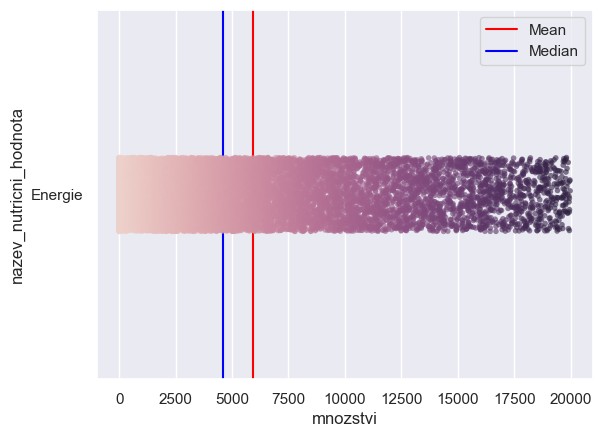

In [87]:
sns.stripplot(data=nutricni_energie, x='mnozstvi', y='nazev_nutricni_hodnota', size=4, alpha=0.6, hue='mnozstvi', legend=False)
plt.axvline(x=nutricni_energie['mnozstvi'].mean(), color='red', label="Mean")
plt.axvline(x=nutricni_energie['mnozstvi'].median(), color='blue', label="Median")
plt.legend()
plt.show()

In [88]:
nutrient_names = ['Tuky', 'Sacharidy', 'Cholesterol', 'Bílkoviny', 'Sodík', 'Sůl', 'Vláknina']

lower_bound = 0.0
upper_bound = 1000.0

# Filter out values outside the specified range
df = df[(df['mnozstvi'] >= lower_bound) & (df['mnozstvi'] <= upper_bound)]

# Select rows for each nutrient using .isin() method
nutricni_tabulka = df[df['nazev_nutricni_hodnota'].isin(nutrient_names)]



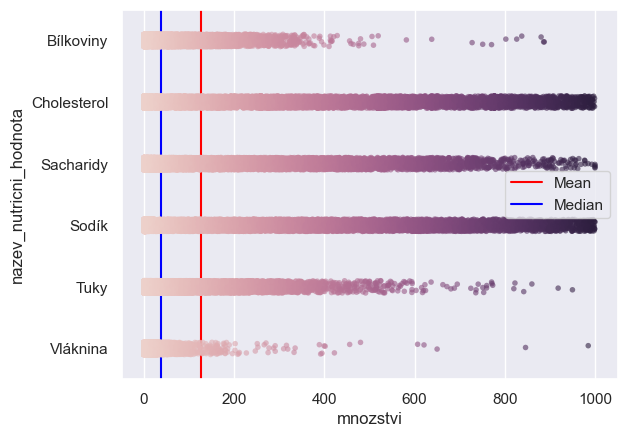

In [89]:
sns.stripplot(data=nutricni_tabulka, x='mnozstvi', y='nazev_nutricni_hodnota', size=4, alpha=0.6, hue='mnozstvi', legend=False)
plt.axvline(x=nutricni_tabulka['mnozstvi'].mean(), color='red', label="Mean")
plt.axvline(x=nutricni_tabulka['mnozstvi'].median(), color='blue', label="Median")
plt.legend()
plt.show()

In [ ]:
nutricni_tabulka['mnozstvi'].hist()
plt.show()